# Experiment 4: Equations on a Bott-Samelson variety

Defining $B \subseteq GL_3$ as the subgroup of upper-triangular matrices, $GL_3/B$ is birational to a Bott-Samelson variety. We draw a random complex square polynomial system on $GL_3/B$ from the Khovanskii basis 

$$\mathcal{B} =  \{1,x,y,z,xz,yz,x(xz+y),y(xz+y)\}.$$

That is, we consider the system 

$$\hat{f}_i = c_{i,1}\;1 + c_{i,2}\;x + c_{i,3}\;y + c_{i,4}\;z + c_{i,5}\;xz + c_{i,6}\;yz + c_{i,7}\;x^2z + c_{i,8}\; xyz + c_{i,7}\;xy + c_{i,8}\;y^2 ,$$

where $i \in \{1,2,3\}$ and $c_{i,j} \in \mathbb{C}$ for $i = 1,2,3$ and $j = 1, \ldots, 8$. 

We activate the project's environment.

In [1]:
using Pkg
Pkg.activate(".")

 Activating environment at `~/Documents/Projects/cox-homotopies/code_cox_homotopies_fix/Project.toml`


We start by including our routines.

In [2]:
include("CoxHomotopy.jl")

polymake version 4.2
Copyright (c) 1997-2020
Ewgenij Gawrilow, Michael Joswig, and the polymake team
Technische Universität Berlin, Germany
https://polymake.org

This is free software licensed under GPL; see the source for copying conditions.
There is NO warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



trackPathRandom (generic function with 1 method)

We generate equations for random $c_{i,j}$.

In [3]:
n = 3;
@polyvar t[1:n];

#Define Khovanskii basis
KB = fill(zero(typeof((0.0+0.0im)*prod(t))),8);
KB[1]=1.0+ 0.0im + 0.0*prod(t);
KB[2]=(1.0+0.0im)*t[1];
KB[3]=(1.0+0.0im)*t[2];
KB[4]=(1.0+0.0im)*t[3];
KB[5]=(1.0+0.0im)*t[1]*t[3];
KB[6]=(1.0+0.0im)*t[2]*t[3];
KB[7]=(1.0+0.0im)*t[1]*(t[1]*t[3]+t[2]);
KB[8]=(1.0+0.0im)*t[2]*(t[1]*t[3]+t[2]);
C = randn(ComplexF64, n, 8);

# System of polynomials on a Bott-Samelson variety
f̂ = C*KB;

We solve the system using the Cox homotopy. We use the option print_progress to display some information about the intermediate computations.

In [4]:
@time homSols, f, toricSols, Fᵀ, x̂, K, B, data = coxHomotopy(f̂; fixSlice = true, details = true, print_progress = true);


Tracking 8 paths... 100%|███████████████████████████████| Time: 0:00:03
  # paths tracked:                  8
  # non-singular solutions (real):  5 (1)
  # singular endpoints (real):      3 (0)
  # total solutions (real):         8 (1)
   trying representative 1
   success! Landed on singular point...
finalizing path 5...
path 5 landed on orbit.
finalizing path 6...
path 6 landed on orbit.
finalizing path 7...
path 7 landed on orbit.
finalizing path 8...
path 8 landed on orbit.
finalizing path 9...
path 9 landed on orbit.
finalizing path 10...
path 10 landed on orbit.
 98.488353 seconds (153.47 M allocations: 7.406 GiB, 3.74% gc time)


The printed information shows that in order to finalize path number 7, we had to switch representatives in the end game. This path lands on a special divisor for $\tau = 0$. Points in this divisor correspond to $G$-orbits whose projective closure has subgeneric degree. 

We compute the residual of the obtained solutions in toric and homogeneous coordinates

In [5]:
display(get_residual(f̂,toricSols,t))
display(get_residual(f,homSols,variables(f)))

10-element Array{Float64,1}:
 1.9119382374183414e-15
 3.0946019544092435e-16
 8.196172987160553e-16
 5.1688888309054e-16
 1.2684335449115903e-15
 3.8292051207100203e-16
 3.972232058384437e-16
 1.816711032320159e-15
 3.663950586988636e-16
 5.463686422118489e-16

10-element Array{Float64,1}:
 5.814978922377011e-17
 2.8948249744131863e-16
 2.3526345243347134e-16
 3.7046461177450653e-16
 1.3528538099765665e-16
 1.0099852363450468e-16
 5.499179554297783e-16
 3.8730096404880665e-17
 4.5504174990229265e-16
 1.751726016490298e-16

We visualize the magnitude of the homogeneous coordinates and conclude that 4 out of the 10 computed solutions lie on the divisor $D_3$. This is similar to what we did in the notebook on Experiment 2. Note that, in particular, the solution corresponding to the fourth column is on this divisor, which corresponds to our observation above. 

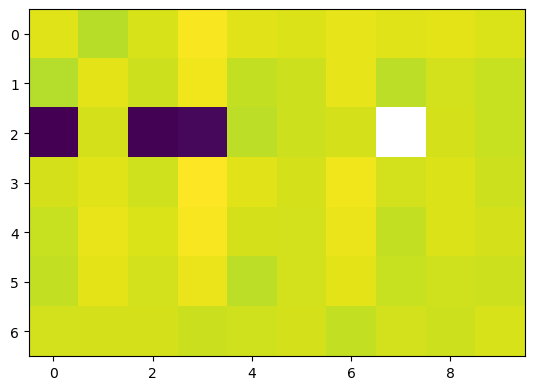

PyObject <matplotlib.image.AxesImage object at 0x171515a90>

In [6]:
using PyPlot
imshow(log10.(abs.(hcat(homSols...))))

From the facet matrix $F^\top$ we see that this divisor corresponds to the facet with normal vector $[-1~-1~0]$.

In [7]:
Fᵀ

7×3 Array{Int64,2}:
  0   0  -1
  0   1   0
 -1  -1   0
  0   0   1
  0  -1  -1
  1   0   0
 -1   0   1